# Cross-validation for parameter tuning, model selection, and feature selection


## Agenda

- What is the drawback of using the **train/test split** procedure for model evaluation?
- How does **K-fold cross-validation** overcome this limitation?
- How can cross-validation be used for selecting **tuning parameters**, choosing between **models**, and selecting **features**?
- What are some possible **improvements** to cross-validation?

## Review of model evaluation procedures

**Motivation:** Need a way to choose between machine learning models

- Goal is to estimate likely performance of a model on **out-of-sample data**

**Initial idea:** Train and test on the same data

- But, maximizing **training accuracy** rewards overly complex models which **overfit** the training data
- It is never a good idea to train and test on the same data.  To see how a model generalizes, you have to hold out some of the data for testing.  This hold out data is **not** used for training.
- This is the concept behind *train-test-split*

**Better idea:** Train/test split

- Split the dataset into two pieces, so that the model can be trained and tested on **different data**
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance
- But, it provides a **high variance** estimate since changing which observations happen to be in the testing set can significantly change testing accuracy
- The reason for **high variance** is that *train-test-split* takes one random sample of the data to perfom the split
  - The next time you run *train-test-split* you will get a new data set and a new accuracy
  - To get a better idea of how a model performs, you would want to take many samples to train and test on.



## K-Fold Cross Validation

Cross-validation is a statitical method of evaluating generalization performance of a model, that is more accurate than just train_test_split.

K-Fold Cross Validation will split a dataset up into a number of different training sets and testing sets to provide you with a better idea of how the model will generalize to unseen data.  

This notebook looks at a number of different Cross Validation techniques to better measure the performance of different models.

- Split the data into multiple pieces so that the model can be trained on many different views of the data
- Each Fold will have an accuracy score and the overall accuracy of the model is commonly measured as the mean of each Fold accuracy.
- Cross validation accounts for the **high variance** and provides a much better representation of performance


### Caveat.

This notebook is focused on what CrossValidation is and how to use it.  When you go to use cross_val_score in practice, then you should perform a train_test_split to hold out a test dataset and only work with the training dataset for the cross_val_score. 

This is pointed out in [StackOverflow](https://stats.stackexchange.com/questions/224287/cross-validation-misuse-reporting-performance-for-the-best-hyperparameter-value/224290#224290)

and

Introduction to Machine Learning with Python: A Guide for Data Scientists
- Book by Andreas Muller and Sarah Guido is a very consumeable guide to machine learning with great insight into the field.

on page 268.  


Again, this notebook does not perform the *train_test_split* so that it can focus on the concept of cross validation and the different way to perform cross validation.


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Problem With train-test-split

Lets look at why *train_test_split* is not a good way to measure overall model performance. 

Below we will use the Iris dataset and use train_test_split a couple of different times

In [2]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

Below we create 3 different training and testing datasets.  Each dataset is a different result of calling *train_test_split*.  Recall *train_test_split* will just grab a random sampling of training and testing data with 75% being set aside for training and 25% being set aside for testing.

Lets see how the accuracy changes based on the train/test split of data.

We would like to account for this variance and show an accuracy representative of all of the data.

In [3]:
# use train/test split letting *train_test_split* randomly select the dataset to use.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y)



# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Use TrainTest Split 1
knn.fit(X_train1, y_train1)
y_pred = knn.predict(X_test1)
accuracy1 = metrics.accuracy_score(y_test1, y_pred)

# Use TrainTest Split 2
knn.fit(X_train2, y_train2)
y_pred = knn.predict(X_test2)
accuracy2 = metrics.accuracy_score(y_test2, y_pred)

# Use TrainTest Split 3
knn.fit(X_train3, y_train3)
y_pred = knn.predict(X_test3)
accuracy3 = metrics.accuracy_score(y_test3, y_pred)


print(f"Split 1: {accuracy1}\nSplit 2: {accuracy2}\nSplit 3: {accuracy3}\nAverage: {(accuracy1+accuracy2+accuracy3)/3}")


Split 1: 0.8947368421052632
Split 2: 1.0
Split 3: 0.9736842105263158
Average: 0.9561403508771931


Notice above if you keep running the cell, the accuracy for each split changes and the overall average accuracy changes.

**Question:** What if we created a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together?

**Answer:** That's the essense of cross-validation!

## Steps for K-fold cross-validation

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

## 5-Fold cross validation

### Cross-validation for more robust estimates


![cross-validation](images/cross_validation.svg)

- Dataset contains **25 observations** (numbered 0 through 24)
- 5-fold cross-validation, thus it runs for **5 iterations**
- For each iteration, every observation is either in the training set or the testing set, **but not both**
- Every observation is in the testing set **exactly once**

## Comparing cross-validation to train/test split

Advantages of **cross-validation:**

- More accurate estimate of out-of-sample accuracy
- More "efficient" use of data (every observation is used for both training and testing)
- Provides a better measure of how the model behaves across all of the known training data

Advantages of **train/test split:**

- Runs K times faster than K-fold cross-validation
- Simpler to examine the detailed results of the testing process

### cross_val_score
The cross_val_score method is part of the scikit-learn package in the model_selection package.  This function will perform the cross validation as described above.

The *cross_val_score* function will behave differently depending upon whether the model is a categorical model or a regression model.  If the model is categorical, *cross_val_score* will also **stratify** the dataset.  If the model is a regression model, then no stratification will take place and will instead just perform a K-Fold cross validation.

*Stratification* is a process where the output training and testing in each fold has the same percentage number of samples as is in the original dataset.  For example, if the data set is 60% Target1 and 40% Target2 - then each fold will be made up of this same percentage.

Lets look at an example of using *cross_val_score* with the Iris dataset.

The scoring parameter to *cross_val_score* could be either a string or a custom scorer.  If a string typical values are:

* accuracy - which performs an accuracy score for each 'k' fold
* roc_auc - which will use the area under the ROC curve for each 'k' fold
* neg_mean_squared_error - when used with regression models, used for each 'k' fold.

In [4]:
from sklearn.model_selection import cross_val_score

In [5]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)

# remember, cross_val_score, will stratify the training/testing set because the model used is a classification model.
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)
print(f"Average score: {scores.mean()}")

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
Average score: 0.9666666666666668


## Custom cross-validation iterators

*cross_val_score* is a versitale function.  It can take a reference to a model_selection instance to change the behavior of the standard *cross_val_score* function.

For example, if you would like to not stratify the training/testing data set, then you can create an instance of the **KFold** model selection class and this class will just perform K-Fold cross validation and will not stratify the input dataset.



In [6]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit

In [7]:
from ml_util import print_test_fold, plot_cv, run_knn_with_cv

In [8]:
print("Iris target values:")
print(y)
print(y.shape)

Iris target values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150,)


## Visualize the folds and training / test sets

For each of the slitter classes, visualize the number of folds, which will be represented as a row in the charts and for each row the data that is part of the test set, which will be marked as yellow and the data that is part of the training set, which is marked as purple.

### KFold 

The K-Fold splitter class will split the dataset into 'k' number of folds of equally portioned data sets.

The first example will take the Iris target values from above, and divide the data into 5 consecutive buckets.

[1.         1.         0.83333333 0.93333333 0.8       ] 
Average: 0.9133333333333333


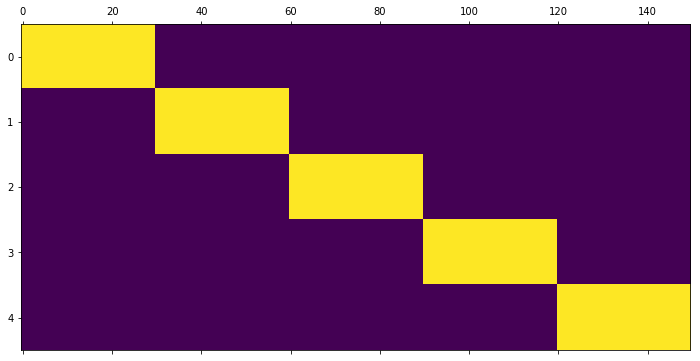

In [9]:
# Split dataset into k consecutive folds (without shuffling by default).
cv = KFold(n_splits=5)
plot_cv(cv, X, y)
scores = run_knn_with_cv(n_neighbors=5, features=X, targets=y, cv=cv)
print(scores, f"\nAverage: {scores.mean()}")

You can see from above how for each fold, where the test data is taken - via the yellow.

What would happen if we reduced the number of folds to 3?  This would exactly match the number of different target values.  The first fold would remove all of the '0' target values for the test set, the second fold would remove all of the '1' target values for the test set, and the third and final fold would remove all of the '2' target values for the test set.  

Lets see how this impacts the generalization.

[0. 0. 0.] 
Average: 0.0


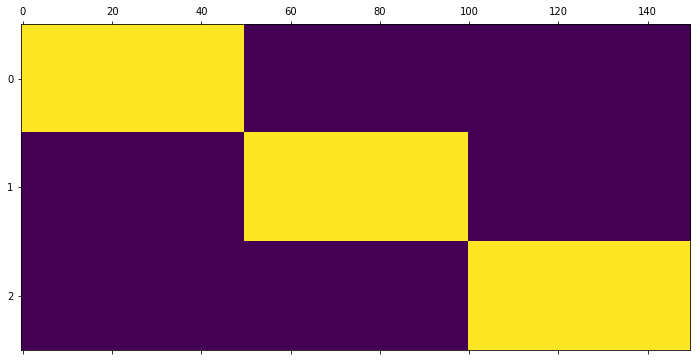

In [10]:
cv = KFold(n_splits=3)
plot_cv(cv, X, y)
scores = run_knn_with_cv(n_neighbors=5, features=X, targets=y, cv=cv)
print(scores, f"\nAverage: {scores.mean()}")

Notice that in this case the accuracy is zero!

This shows exactly why **stratification** is important when creating the training and testing data sets.  It is important that the training and testing represent the real world.


[1.         1.         1.         1.         0.8        0.86666667
 1.         0.86666667 0.8        1.        ] 
Average: 0.9333333333333333


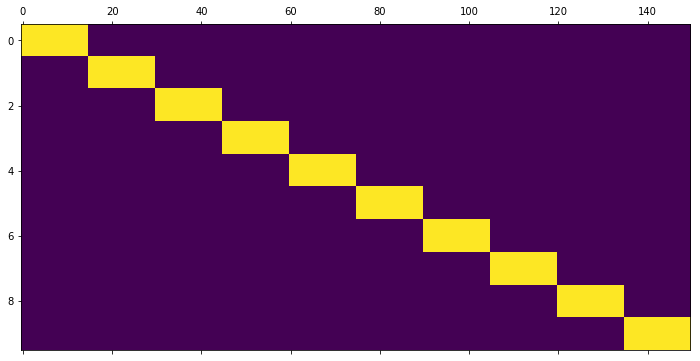

In [11]:
# shuffle the data BEFORE splitting into batches
cv = KFold(n_splits=10)
plot_cv(cv, X, y)
scores = run_knn_with_cv(n_neighbors=5, features=X, targets=y, cv=cv)
print(scores, f"\nAverage: {scores.mean()}")

[0.96666667 0.96666667 1.         0.96666667 0.93333333] 
Average: 0.9666666666666668


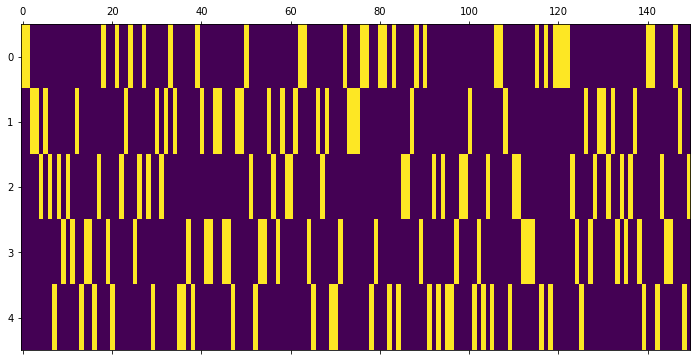

In [12]:
cv = KFold(n_splits=5, shuffle=True)
plot_cv(cv, X, y)
scores = run_knn_with_cv(n_neighbors=5, features=X, targets=y, cv=cv)
print(scores, f"\nAverage: {scores.mean()}")

### Stratified KFold

[0.96666667 1.         0.93333333 0.96666667 1.        ] 
Average: 0.9733333333333334


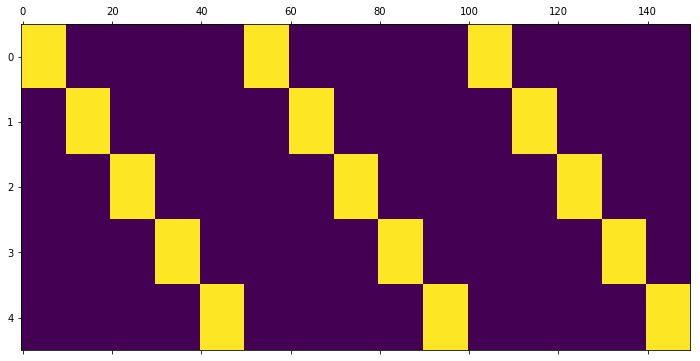

In [13]:
# This cross-validation object is a variation of KFold that returns stratified folds. 
# The folds are made by preserving the percentage of samples for each class.

cv = StratifiedKFold(n_splits=5)
plot_cv(cv, X,y)
scores = run_knn_with_cv(n_neighbors=5, features=X, targets=y, cv=cv)
print(scores, f"\nAverage: {scores.mean()}")

[0.96666667 0.96666667 0.93333333 1.         0.96666667] 
Average: 0.9666666666666666


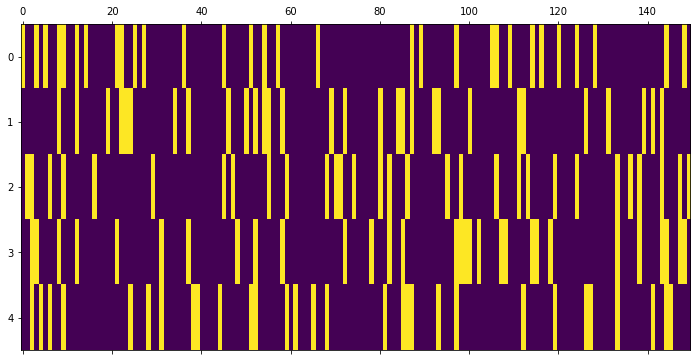

In [14]:
# Random permutation cross-validator
# Note: contrary to other cross-validation strategies, random splits do not guarantee 
#that all folds will be different, although this is still very likely for sizeable datasets.

cv = ShuffleSplit(n_splits=5, test_size=.2)
plot_cv(cv, X, y)
scores = run_knn_with_cv(n_neighbors=5, features=X, targets=y, cv=cv)
print(scores, f"\nAverage: {scores.mean()}")

### ShuffleSplit

[0.96666667 0.96666667 1.         1.         0.96666667 0.96666667
 0.96666667 0.96666667 1.         0.93333333 0.86666667 0.96666667
 0.93333333 0.96666667 0.93333333 0.93333333 0.93333333 1.
 1.         0.93333333] 
Average: 0.96


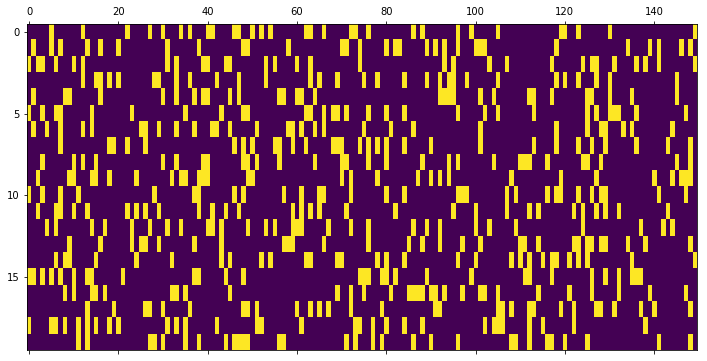

In [15]:
cv = ShuffleSplit(n_splits=20, test_size=.2)
plot_cv(cv, X, y)
scores = run_knn_with_cv(n_neighbors=5, features=X, targets=y, cv=cv)
print(scores, f"\nAverage: {scores.mean()}")

[0.96666667 0.93333333 0.96666667 0.93333333 0.93333333 1.
 0.93333333 0.96666667 0.93333333 0.93333333 1.         1.
 1.         0.86666667 1.         0.96666667 1.         0.96666667
 1.         1.        ] 
Average: 0.9649999999999999


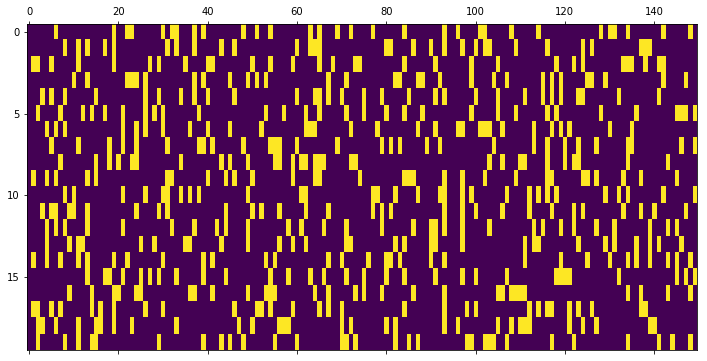

In [16]:
# This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, 
# which returns stratified randomized folds. The folds are made by preserving the 
# percentage of samples for each class.

cv = StratifiedShuffleSplit(n_splits=20, test_size=.2)
plot_cv(cv, X, y)
scores = run_knn_with_cv(n_neighbors=5, features=X, targets=y, cv=cv)
print(scores, f"\nAverage: {scores.mean()}")

## Cross-validation recommendations

1. K can be any number, but **K=10** is generally recommended
    - remember, this 'K' is the number of folds, NOT the number of neighbors for KNN.
2. For classification problems, **stratified sampling** is recommended for creating the folds
    - Each response class should be represented with equal proportions in each of the K folds
    - scikit-learn's `cross_val_score` function does this by default

## Cross-validation example: parameter tuning

**Goal:** Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [19]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())
print(type(scores))

0.9666666666666668
<class 'numpy.ndarray'>


In [20]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
print(f"Average: {np.asarray(k_scores).mean()}")
print(f"Max: {np.asarray(k_scores).max()}")

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]
Average: 0.9673333333333332
Max: 0.9800000000000001


Text(0,0.5,'Cross-Validated Accuracy')

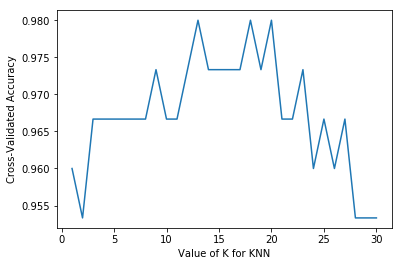

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

From the plot above, you can see that k=20, produced the most accurate model.

lets try to create a KNeighborsClassifier with neighbors =20

In [22]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.9800000000000001


#### LogisticRegression

Lets try another classification model, this time LogisticRegression.

We will still use 10 Fold Cross-Validation, against the same dataset.

In [23]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.9533333333333334


## Linear Regression with Cross-validation example: feature selection

Lets look at using Cross-Validation with a regression model.  

This particular example will be explained in more detail later, so for now, just use this as an example of how to use *cross-val_score* with a regression model.

**Note,  you cannot use the custom cross validation 

**Goal**: Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [25]:
# read in the advertising dataset
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [26]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [27]:
# create a Python list of three feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the DataFrame (X)
X = data[feature_cols]

# select the Sales column as the response (y)
y = data.sales

Remember that with regression models, cross_val_score **do not** use stratification but just consecutive K Folds.

In [28]:
# 10-fold cross-validation with all three features
lm = LinearRegression()
rmse_all_features = np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean()
print(rmse_all_features)

1.6913531708051803


/Users/patrickryan/Development/python/mygithub/machinelearning101/venv/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


The RMSE for all 3 features ( TV, radio, newspaper ) is 1.69.

In [29]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'radio']
X2 = data[feature_cols]
rmse_no_advertising = np.sqrt(-cross_val_score(lm, X2, y, cv=10, scoring='neg_mean_squared_error')).mean()
print(rmse_no_advertising)

1.6796748419090766


You can see that without Advertising the RMSE is lower, and therefore advertising does not help the accuracy of the model.

Lets try another KFold splitter with the LinearRegression model.  **Note you cannot use a stratified Cross-Validation splitter because stratified is only for classification models**


In [30]:
cv = ShuffleSplit(n_splits=5, test_size=.2)
rmse_cv = np.sqrt(-cross_val_score(lm, X2, y, cv=cv, scoring='neg_mean_squared_error')).mean()
print(rmse_cv)



1.4792340722250874


### Conclusion

Since the error without Newspaper is lower, we can then say that we should drop the Newspaper feature column from the data set when creating the model.

## Improvements to cross-validation

**Repeated cross-validation**

- Repeat cross-validation multiple times (with **different random splits** of the data) and average the results
- More reliable estimate of out-of-sample performance by **reducing the variance** associated with a single trial of cross-validation

**Creating a hold-out set**

- "Hold out" a portion of the data **before** beginning the model building process
- Locate the best model using cross-validation on the remaining data, and test it **using the hold-out set**
- More reliable estimate of out-of-sample performance since hold-out set is **truly out-of-sample**

**Feature engineering and selection within cross-validation iterations**

- Normally, feature engineering and selection occurs **before** cross-validation
- Instead, perform all feature engineering and selection **within each cross-validation iteration**
- More reliable estimate of out-of-sample performance since it **better mimics** the application of the model to out-of-sample data

## Resources

- scikit-learn documentation: [Cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html), [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
- scikit-learn issue on GitHub: [MSE is negative when returned by cross_val_score](https://github.com/scikit-learn/scikit-learn/issues/2439)
- Section 5.1 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) (11 pages) and related videos: [K-fold and leave-one-out cross-validation](https://www.youtube.com/watch?v=nZAM5OXrktY) (14 minutes), [Cross-validation the right and wrong ways](https://www.youtube.com/watch?v=S06JpVoNaA0) (10 minutes)
- Scott Fortmann-Roe: [Accurately Measuring Model Prediction Error](http://scott.fortmann-roe.com/docs/MeasuringError.html)
- Machine Learning Mastery: [An Introduction to Feature Selection](http://machinelearningmastery.com/an-introduction-to-feature-selection/)
- Harvard CS109: [Cross-Validation: The Right and Wrong Way](https://github.com/cs109/content/blob/master/lec_10_cross_val.ipynb)
- Journal of Cheminformatics: [Cross-validation pitfalls when selecting and assessing regression and classification models](http://www.jcheminf.com/content/pdf/1758-2946-6-10.pdf)